In [1]:
#第三方库以及工作路径转换
import numpy as np
import pandas as pd
from scipy import stats
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
import sys
sys.path.append("D:\\1st\\BPs_BPTK\\Python") 
sys.path.append("D:\\1st\\BPs_BPTK") 
from BPS_init_function_MultiParas import BPS_BPTK_MultiParas
import os
os.chdir('d:\\1st\\BPs_BPTK')
%matplotlib inline

In [2]:
#导入数据

PlasmaFivePoints1 = np.load('D:\\1st\\BPs_BPTK\\Python\\getdata\\plasma\\PlasmaFivePoints1.npy')
PlasmaFivePointsValue1 =np.load('D:\\1st\\BPs_BPTK\\Python\\getdata\\plasma\\PlasmaFivePointsValue1.npy')
PlasmaFivePoints2 = np.load('D:\\1st\\BPs_BPTK\\Python\\getdata\\plasma\\PlasmaFivePoints2.npy')
PlasmaFivePointsValue2 =np.load('D:\\1st\\BPs_BPTK\\Python\\getdata\\plasma\\PlasmaFivePointsValue2.npy')

UrineFivePoints1 = np.load('D:\\1st\\BPs_BPTK\\Python\\getdata\\urine\\UrineFivePoints1.npy')
UrineFivePointsValue1 =np.load('D:\\1st\\BPs_BPTK\\Python\\getdata\\urine\\UrineFivePointsValue1.npy')
UrineFivePoints2 = np.load('D:\\1st\\BPs_BPTK\\Python\\getdata\\urine\\UrineFivePoints2.npy')
UrineFivePointsValue2 =np.load('D:\\1st\\BPs_BPTK\\Python\\getdata\\urine\\UrineFivePointsValue2.npy')

UrinegFivePoints1 = np.load('D:\\1st\\BPs_BPTK\\Python\\getdata\\urineg\\UrinegFivePoints1.npy')
UrinegFivePointsValue1 =np.load('D:\\1st\\BPs_BPTK\\Python\\getdata\\urineg\\UrinegFivePointsValue1.npy')
UrinegFivePoints2 = np.load('D:\\1st\\BPs_BPTK\\Python\\getdata\\urineg\\UrinegFivePoints2.npy')
UrinegFivePointsValue2 =np.load('D:\\1st\\BPs_BPTK\\Python\\getdata\\urineg\\UrinegFivePointsValue2.npy')

label1= np.load("D:\\1st\\BPs_BPTK\\Python\\optim\\DataFromBPTK\\labels_zzc.npy")
label2= np.load("D:\\1st\\BPs_BPTK\\Python\\optim\\DataFromBPTK\\labels_SG.npy")
label = np.vstack((label1,label2))
label_slice_plasma1 = label[PlasmaFivePoints1[:,0].astype(int),:]
label_slice_urine1 = label[UrineFivePoints1[:,0].astype(int),:]
label_slice_urineg1 = label[UrinegFivePoints1[:,0].astype(int),:]

In [3]:
j = 0
time = np.arange(0,75,0.005) #七十五个小时的时间戳

a = np.reshape(label[33,:],(1,3))
plasma,urine,urineg = BPS_BPTK_MultiParas(t = time,volunteer_ID =j, paras = a ,mode = '63')
urine = np.diff(urine)
urineg = np.diff(urineg)

100%|██████████| 1/1 [00:00<00:00,  7.57it/s]


In [4]:

urine[0,UrineFivePoints1[np.where(UrineFivePointsValue1[:,0]==33),1:].astype(int)]-UrineFivePointsValue1[np.where(UrineFivePointsValue1[:,0]==33),1:]


array([[[0., 0., 0., 0., 0.]]])

In [5]:
print(UrineFivePointsValue1[np.where(UrineFivePointsValue1[:,3]>0.02),0].astype(int))

[]


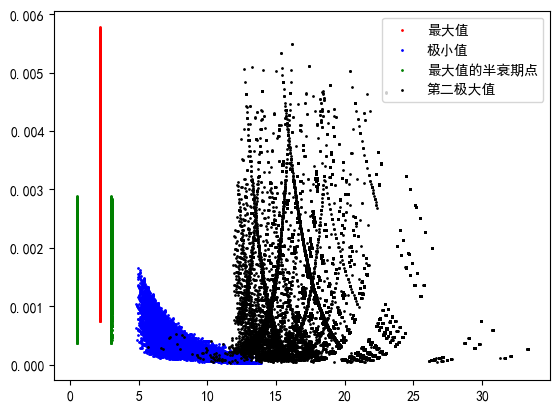

In [6]:
time = np.arange(0,33,0.005)
plt.scatter(PlasmaFivePoints1[:,2]/200,PlasmaFivePointsValue1[:,2],c='red',s = 1, label = '最大值')
plt.scatter(PlasmaFivePoints1[:,4]/200,PlasmaFivePointsValue1[:,4],c='blue',s = 1, label = '极小值')
plt.scatter(PlasmaFivePoints1[:,1]/200,PlasmaFivePointsValue1[:,1],c='green',s = 1, label = '最大值的半衰期点')
plt.scatter(PlasmaFivePoints1[:,3]/200,PlasmaFivePointsValue1[:,3],c='green',s = 1)
plt.scatter(PlasmaFivePoints1[:,5]/200,PlasmaFivePointsValue1[:,5],c='black',s = 1, label = '第二极大值')
#plt.plot(time,plasma[0,:33*200])
#plt.ylabel ( '血浆中BPS的含量')
plt.legend()
plt.show()

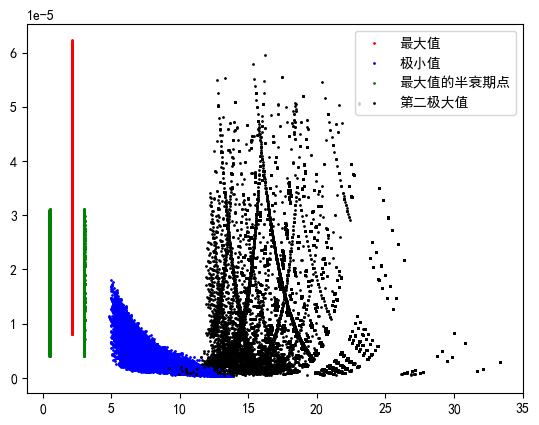

In [18]:
time = np.arange(0,33,0.005)
plt.scatter(UrineFivePoints1[:,2]/200,UrineFivePointsValue1[:,2],c='red',s = 1, label = '最大值')
plt.scatter(UrineFivePoints1[:,4]/200,UrineFivePointsValue1[:,4],c='blue',s = 1, label = '极小值')
plt.scatter(UrineFivePoints1[:,1]/200,UrineFivePointsValue1[:,1],c='green',s = 1, label = '最大值的半衰期点')
plt.scatter(UrineFivePoints1[:,3]/200,UrineFivePointsValue1[:,3],c='green',s = 1)
plt.scatter(UrineFivePoints1[:,5]/200,UrineFivePointsValue1[:,5],c='black',s = 1, label = '第二极大值')
#plt.plot(time,urine[0,:33*200])
#plt.ylabel('尿液中BPS的累计含量') 
plt.legend()
plt.show()

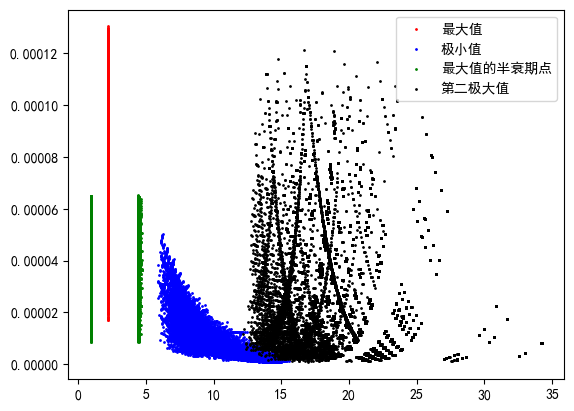

In [19]:
time = np.arange(0,33,0.005)
plt.scatter(UrinegFivePoints1[:,2]/200,UrinegFivePointsValue1[:,2],c='red',s = 1, label = '最大值')
plt.scatter(UrinegFivePoints1[:,4]/200,UrinegFivePointsValue1[:,4],c='blue',s = 1, label = '极小值')
plt.scatter(UrinegFivePoints1[:,1]/200,UrinegFivePointsValue1[:,1],c='green',s = 1, label = '最大值的半衰期点')
plt.scatter(UrinegFivePoints1[:,3]/200,UrinegFivePointsValue1[:,3],c='green',s = 1)
plt.scatter(UrinegFivePoints1[:,5]/200,UrinegFivePointsValue1[:,5],c='black',s = 1, label = '第二极大值')
#plt.plot(time,urineg[0,:33*200])
plt.legend()
#plt.ylabel("尿液中BPS-g的累计含量") 
plt.show()

In [9]:
#计算血浆曲线重心
print(np.mean(PlasmaFivePoints1[:,1])) #98
print(np.mean(PlasmaFivePoints1[:,2])) #433  2.165
print(np.mean(PlasmaFivePoints1[:,3])) #601 3.005
print(np.mean(PlasmaFivePoints1[:,4])) #1644  8.22
print(np.mean(PlasmaFivePoints1[:,5])) #3651 18.255

98.47737648601003
433.0
601.4611038285947
1644.5953532522715
3651.085431451431


In [10]:
#计算尿液曲线重心
print(np.mean(UrineFivePoints1[:,1])) #101 0.505
print(np.mean(UrineFivePoints1[:,2])) #433 2.165
print(np.mean(UrineFivePoints1[:,3])) #608 3.04
print(np.mean(UrineFivePoints1[:,4])) #1653 8.265
print(np.mean(UrineFivePoints1[:,5])) #3661 13.305

100.84488538552142
433.0
607.8187007338951
1653.393675817704
3661.0364229410166


In [11]:
#计算尿液g曲线重心
print(np.mean(UrinegFivePoints1[:,1]))
print(np.mean(UrinegFivePoints1[:,2]))
print(np.mean(UrinegFivePoints1[:,3]))
print(np.mean(UrinegFivePoints1[:,4]))
print(np.mean(UrinegFivePoints1[:,5]))

185.12276863408084
436.0
889.1462881010392
1941.505693401621
3876.724329968674


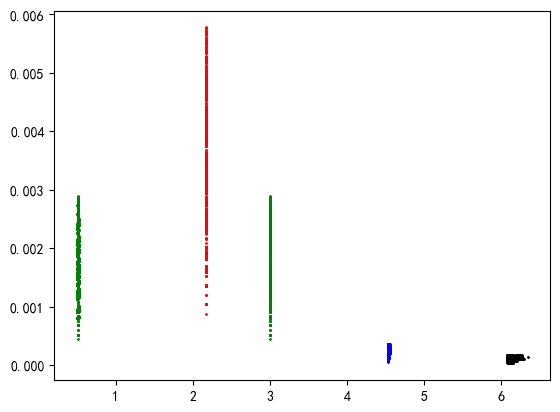

In [12]:
time = np.arange(0,33,0.005)
plt.scatter(PlasmaFivePoints2[:,2]/200,PlasmaFivePointsValue2[:,2],c='red',s = 1)
plt.scatter(PlasmaFivePoints2[:,4]/200,PlasmaFivePointsValue2[:,6],c='blue',s = 1)
plt.scatter(PlasmaFivePoints2[:,1]/200,PlasmaFivePointsValue2[:,1],c='green',s = 1)
plt.scatter(PlasmaFivePoints2[:,3]/200,PlasmaFivePointsValue2[:,3],c='green',s = 1)
plt.scatter(PlasmaFivePoints2[:,5]/200,PlasmaFivePointsValue2[:,7],c='black',s = 1)
#plt.plot(time,data[0:33*200])
plt.show()

In [13]:

print(PlasmaFivePoints1[np.where(PlasmaFivePoints1[:,5]/200>30),0])

print(PlasmaFivePointsValue1[np.where(PlasmaFivePointsValue1[:,2]>0.0053),0])

[[ 9006.  9010.  9029.  9040.  9070.  9089.  9096.  9100.  9119.  9126.
   9130.  9149.  9156.  9160.  9179.  9186.  9190.  9209.  9220.  9239.
   9246.  9250.  9269.  9280.  9299.  9306.  9310.  9329.  9340.  9370.
   9389.  9396.  9400.  9419.  9426.  9430.  9449.  9456.  9460.  9479.
   9486.  9490.  9509.  9516.  9520.  9539.  9546.  9550.  9569.  9576.
   9580.  9599.  9606.  9610.  9629.  9640.  9659.  9666.  9670.  9689.
   9696.  9700.  9719.  9726.  9730.  9749.  9760.  9779.  9786.  9790.
   9809.  9816.  9820.  9839.  9846.  9869.  9876.  9880.  9899. 26110.
  26140. 26170. 26200. 26230. 26260. 26290. 26320. 26350. 26380. 26410.
  26440. 26470. 26500. 26530. 26560. 26590. 26620. 26650. 26680. 26710.
  26740. 26770. 26800. 26830. 26860. 26890. 26920. 26950. 26980.]]
[[30770. 30772. 30775. 30776. 30781. 30782. 30783. 30792. 30793. 30794.
  30795. 30796. 30797. 30798. 30799. 30815. 30816. 30817. 30818. 30819.
  30820. 30821. 30822. 30823. 30824. 30825. 30826. 30827. 30828. 3082

In [14]:
slope, intercept, r_value, p_value, std_err = stats.linregress(label_slice_plasma1[:,1], PlasmaFivePoints1[:,4])
print(r_value)
print(p_value)
print(slope)
print(intercept)

-0.04600055786855611
7.633229945099022e-12
-8.645914452348714
1699.785992561304


In [15]:
slope, intercept, r_value, p_value, std_err = stats.linregress(label_slice_plasma1[:,1], PlasmaFivePointsValue1[:,5])
print(r_value)
print(p_value)
print(slope)
print(intercept)

0.35815569547363124
0.0
0.00018026479692061874
-8.527184963434036e-06


DSC与极小值点和第二极大值点的位置强相关, 相关系数R分别为:-0.71,-0.91

DSC与极小值点和第二极大值点的取值较相关，相关系数R分别为:0.76,0.43

DSC与第一极大值点&第一极大值点的两个1/2点的位置完全不相关，与它们三个点的取值弱相关,相关系数R为:0.1967

PFO与极小值点和第二极大值点的位置几乎不相关, 相关系数R分别为:-0.04,-0.11

PFO与极小值点和第二极大值点的取值较相关，相关系数R分别为:0.53,0.35

PFO与第一极大值点&第一极大值点的两个1/2点的位置完全不相关，与它们三个点的取值极强相关,相关系数R为:0.9997

u1与极小值点的位置弱相关相关系数R为:-0.16  和第二极大值点的位置强相关, 相关系数R为:-0.89

u1与极小值点和第二极大值点的取值弱相关，相关系数R分别为:0.24,0.189

u1与第一极大值点&第一极大值点的两个1/2点的位置完全不相关，与它们三个点的取值极不相关,相关系数R为:-0.0048


三参数与血浆药含量曲线中特殊点的位置、取值的相关性总结：
第一极大值点（最大值点）的位置以及它的两个1/2点的位置与三个参数都无关

DSC微弱影响最大值点的取值，PFO与最大值点的取值极强相关，u1与最大值点的取值几乎无关
DSC和极小值点的位置

In [16]:
slope, intercept, r_value, p_value, std_err = stats.linregress(label_slice_urine1[:,2], UrineFivePoints1[:,4])
print(r_value)
print(p_value)
print(slope)
print(intercept)

-0.170733164861427
5.115937066840169e-144
-39.29116825462262
1890.5703178211995


In [17]:
slope, intercept, r_value, p_value, std_err = stats.linregress(label_slice_urine1[:,2], UrineFivePointsValue1[:,2])
print(r_value)
print(p_value)
print(slope)
print(intercept)

-0.0056378136969308925
0.4022625144854257
-3.711557559222652e-08
3.494465451857326e-05
